# Generation of data
Vicente A. Arévalo

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit as cv

#  Hydra analysis

In [2]:
key1="Hydra"
key2="Norma"

In [3]:
contenido = os.listdir("/home/vicente/cold_hi_project/High-lat_Yachay (1)/ATCA_HI_spectra/"+key1) # to get acces to the files in the directory

In [4]:
# Clasifying the data depending on the velocity resolution
v2=[]
v4=[]
for i in contenido:
    if "v" in i:     #Low velocities
        v2.append(i.split('.')[0]) 
    if "k" in i:     #high velocities
        v4.append(i.split('.')[0])

## Functions to work

In [5]:
#creating a list in order to get the full path of the required file
def full_path(file,folder):
    information=[]
    for i in range(len(file)):
        f="/home/vicente/cold_hi_project/High-lat_Yachay (1)/ATCA_HI_spectra/"+folder+'/'+file[i]+".txt"
        information.append(f)
    return information

In [6]:
# This function allows to calculate the continuum emission line
def continuum1(filename):
    data=pd.read_table(filename) #reading the file
    amplitude=data['Amplitude']
    velocity=data['velocity']
    
    def func(x,a,b): # doing the fitting using curve fit.
        return a*velocity+b
    coef, cova=cv(func,velocity, amplitude)
    fitting=func(velocity,*coef)
    e_tau= amplitude/fitting  #e^{-tau} spectrum
    return velocity, e_tau
    

In [7]:
#the function to calculate the root mean square of the data
def root_mean(x):
    rms = np.sqrt(np.mean(x**2))
    return rms


In [8]:
# this function is important to calculate all the parameters:
# rms, signal to noise, maximum noise, maximum signal, spectral range, standar deviation

def getting_data(file): #the argument is the full path of the file
    maximum= np.abs(np.max(file)-1) #maximum noise
    minimum=np.abs(1-np.min(file)) #maximum signal
    ranges=minimum-maximum #spectral range
    deviation= np.std(file) #standar deviation
    rmsq=root_mean(file) #root mean square
    sn=maximum/minimum  #signal to noise
    return rmsq, deviation,sn, maximum,minimum, ranges

In [9]:
def write(argument1): # the argument must be a tuple with the require operations
    root=[]  #root mean square
    sdeviation=[] #standar deviation
    snoise=[]  #signal to noise
    maxi=[] #maximum signal
    mini=[]  #maximum noise
    srange=[]  #spectral range
    
    for i in argument1:
        # in this part the operations are applied to every file
        root.append(getting_data(continuum1(i)[1])[0])
        sdeviation.append(getting_data(continuum1(i)[1])[1])
        snoise.append(getting_data(continuum1(i)[1])[2])
        maxi.append(getting_data(continuum1(i)[1])[3])
        mini.append(getting_data(continuum1(i)[1])[4])
        srange.append(getting_data(continuum1(i)[1])[5])
    return root, sdeviation, snoise, maxi, mini, srange
            

In [10]:
def histograms(file, title, text): # allow to plot histograms. arguments: data, title of the plot, x_label of the plot; the 
    #last two must be strings
    plt.hist(file, bins=50,color = "lightblue", ec="black")
    plt.xlabel(text)
    plt.ylabel("Counts")
    plt.title(title)
    plt.show()
    

### 0.2 km/s velocity resolution. 

In [11]:
hydra_v2 = pd.DataFrame({'Name': v2, 'rms': write(full_path(v2,key1))[0],
                   'S.Deviation':write(full_path(v2,key1))[1],
                   'S/N':write(full_path(v2,key1))[2],
                  'Max.noise':write(full_path(v2,key1))[3],
                  'Max.signal':write(full_path(v2,key1))[4],
                  'S.Range':write(full_path(v2,key1))[5]})

hydra_v2.to_csv("Information_Hydra_v2.csv", sep=',', float_format='{:.2e}'.format,index=False)

### 4 km/s velocity resolution. 

In [12]:
hydra_v4 = pd.DataFrame({'Name': v4, 'rms': write(full_path(v4,key1))[0],
                   'S.Deviation':write(full_path(v4,key1))[1],
                   'S/N':write(full_path(v4,key1))[2],
                  'Max.noise':write(full_path(v4,key1))[3],
                  'Max.signal':write(full_path(v4,key1))[4],
                  'S.Range':write(full_path(v4,key1))[5]})

hydra_v4.to_csv("Information_Hydra_v4.csv", sep=',', float_format='{:.2e}'.format,index=False)

In [13]:
hydrav2= pd.read_csv("Information_Hydra_v2.csv", sep = ",")
hydrav4= pd.read_csv("Information_Hydra_v4.csv", sep = ",")


## Histograms Hydra

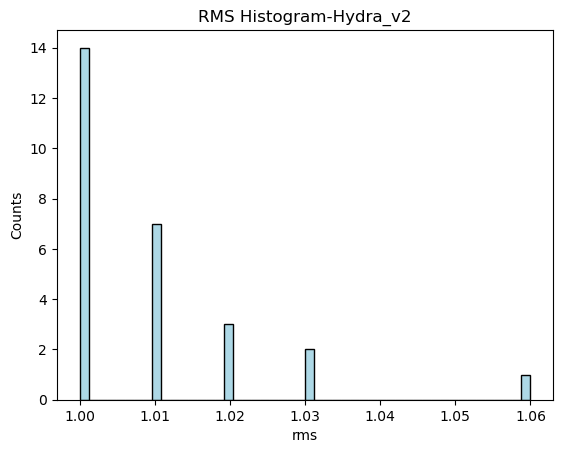

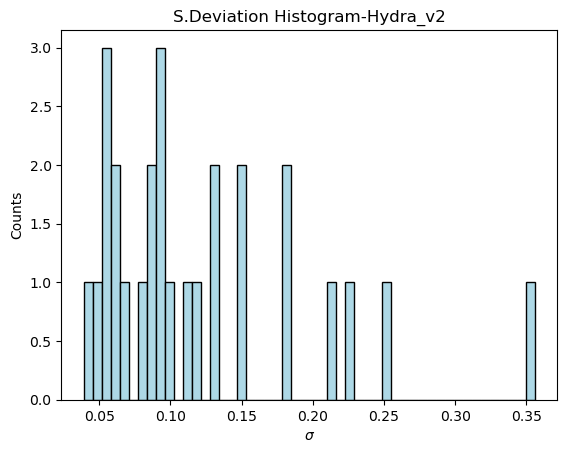

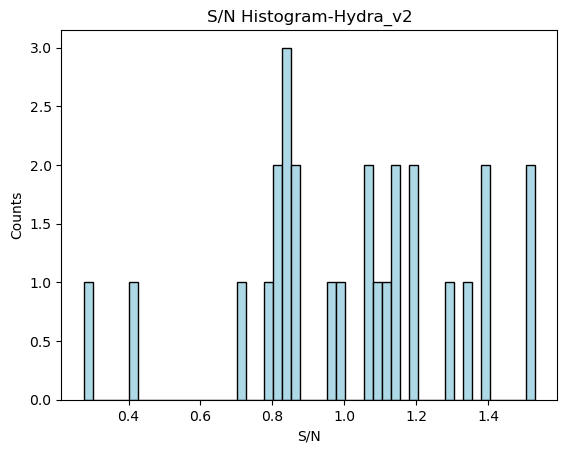

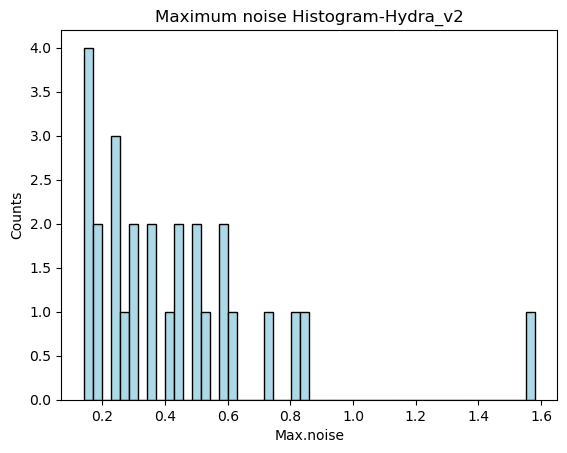

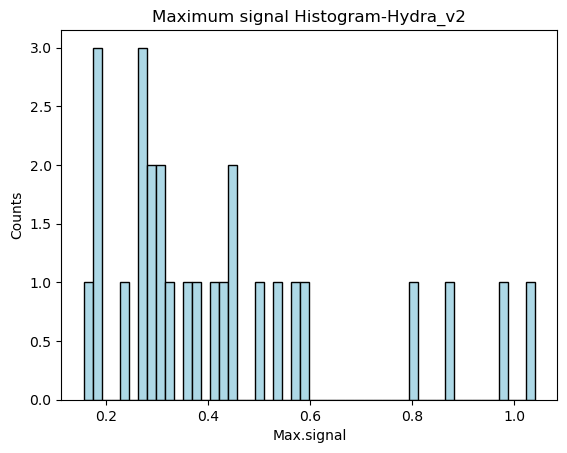

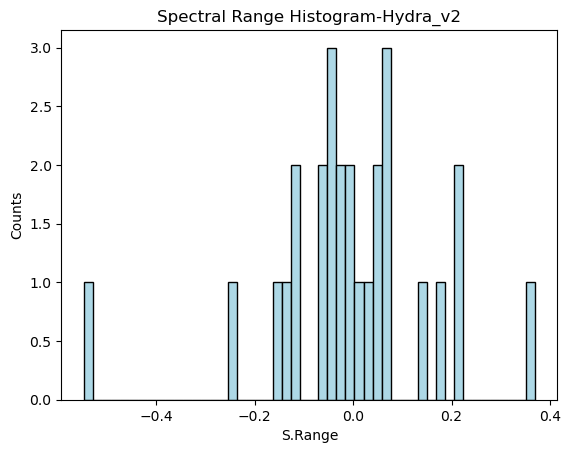

In [16]:
H1=histograms(hydrav2['rms'], 'RMS Histogram-Hydra_v2','rms')
H2=histograms(hydrav2['S.Deviation'], 'S.Deviation Histogram-Hydra_v2',r'$\sigma$')
H3=histograms(hydrav2['S/N'], 'S/N Histogram-Hydra_v2','S/N')
H4=histograms(hydrav2['Max.noise'], 'Maximum noise Histogram-Hydra_v2','Max.noise')
H5=histograms(hydrav2['Max.signal'], 'Maximum signal Histogram-Hydra_v2','Max.signal')
H6=histograms(hydrav2['S.Range'], 'Spectral Range Histogram-Hydra_v2','S.Range')

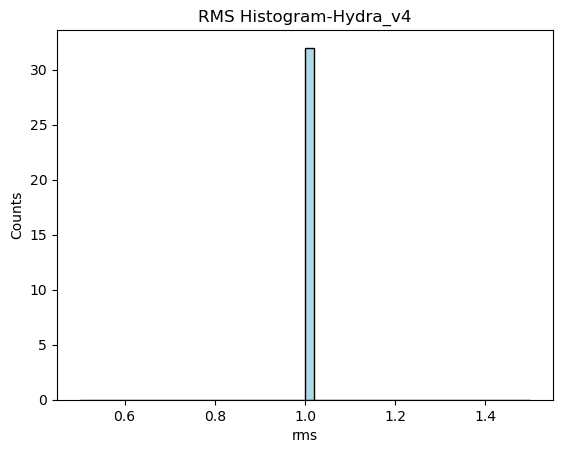

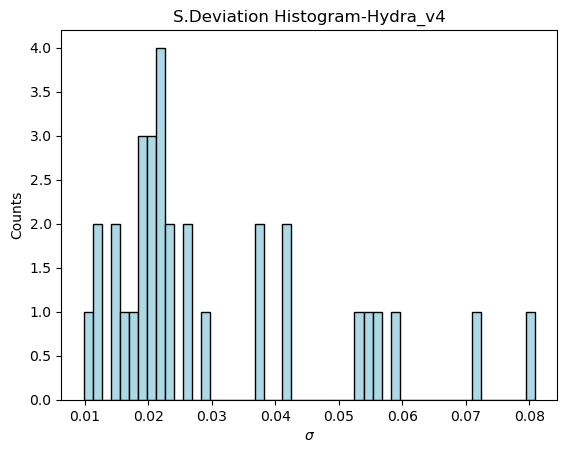

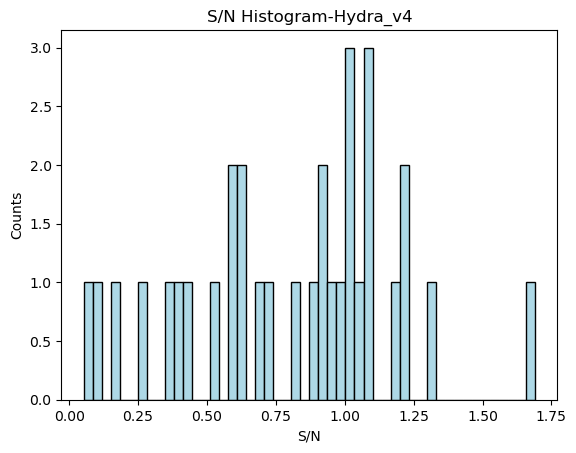

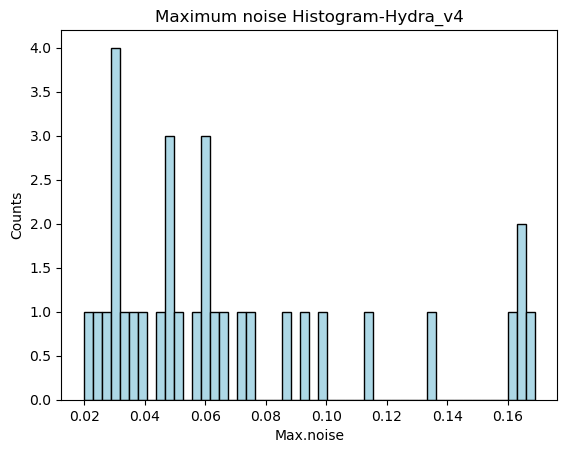

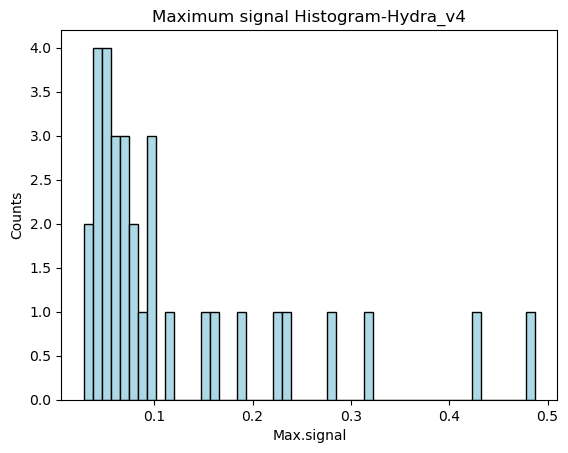

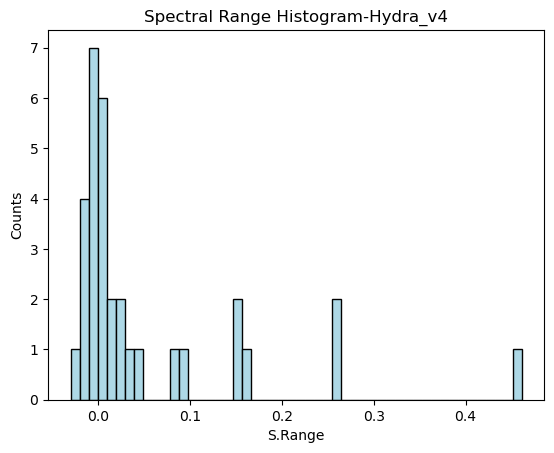

In [17]:
H7=histograms(hydrav4['rms'], 'RMS Histogram-Hydra_v4','rms')
H8=histograms(hydrav4['S.Deviation'], 'S.Deviation Histogram-Hydra_v4',r'$\sigma$')
H9=histograms(hydrav4['S/N'], 'S/N Histogram-Hydra_v4','S/N')
H10=histograms(hydrav4['Max.noise'], 'Maximum noise Histogram-Hydra_v4','Max.noise')
H11=histograms(hydrav4['Max.signal'], 'Maximum signal Histogram-Hydra_v4','Max.signal')
H12=histograms(hydrav4['S.Range'], 'Spectral Range Histogram-Hydra_v4','S.Range')

# Norma analysis

In [18]:
contenido1= os.listdir("/home/vicente/cold_hi_project/High-lat_Yachay (1)/ATCA_HI_spectra/"+key2) # to get acces to the files in the directory

In [19]:
# Clasifying the data depending on the velocity resolution
v22=[]
v44=[]
for i in contenido1:
    if "v" in i:     #Low velocities
        v22.append(i.split('.')[0]) 
    if "k" in i:     #high velocities
        v44.append(i.split('.')[0])

### 0.2 km/s velocity resolution. 

In [20]:
norma_v2 = pd.DataFrame({'Name': v22, 'rms': write(full_path(v22,key2))[0],
                   'S.Deviation':write(full_path(v22,key2))[1],
                   'S/N':write(full_path(v22,key2))[2],
                  'Max.noise':write(full_path(v22,key2))[3],
                  'Max.signal':write(full_path(v22,key2))[4],
                  'S.Range':write(full_path(v22,key2))[5]})

norma_v2.to_csv("Information_Norma_v2.csv", sep=',', float_format='{:.2e}'.format,index=False)

### 4 km/s velocity resolution. 

In [21]:
norma_v4 = pd.DataFrame({'Name': v44, 'rms': write(full_path(v44,key2))[0],
                   'S.Deviation':write(full_path(v44,key2))[1],
                   'S/N':write(full_path(v44,key2))[2],
                  'Max.noise':write(full_path(v44,key2))[3],
                  'Max.signal':write(full_path(v44,key2))[4],
                  'S.Range':write(full_path(v44,key2))[5]})

norma_v4.to_csv("Information_Norma_v4.csv", sep=',', float_format='{:.2e}'.format,index=False)

In [22]:
normav2= pd.read_csv("Information_Norma_v2.csv", sep = ",")

In [23]:
normav4= pd.read_csv("Information_Norma_v4.csv", sep = ",")

## Histograms Norma

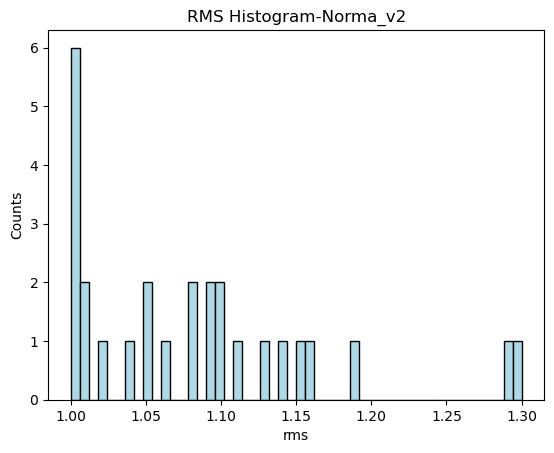

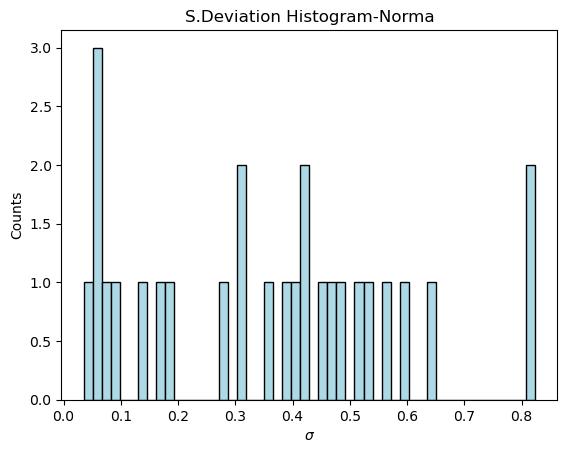

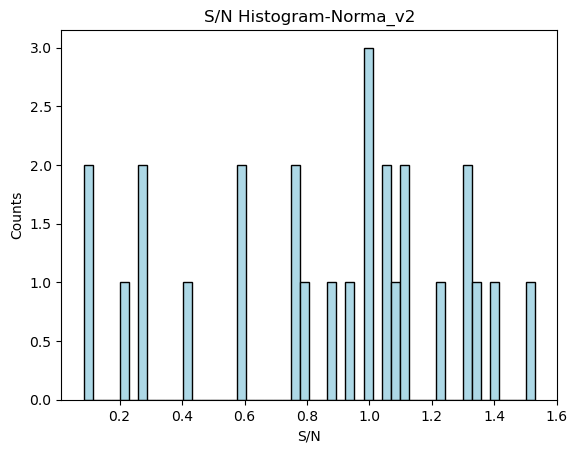

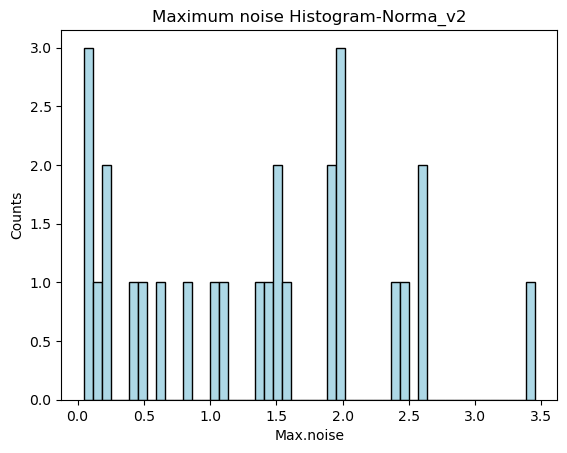

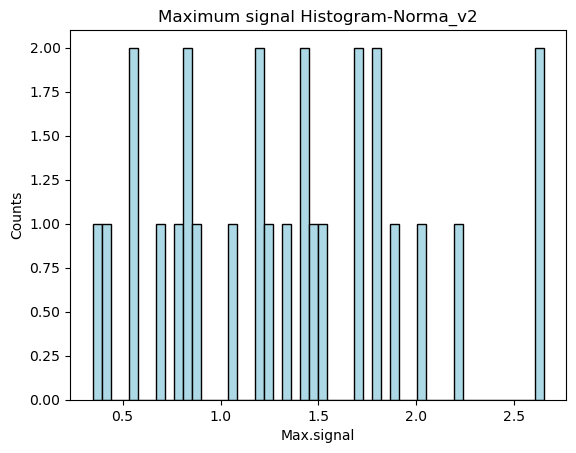

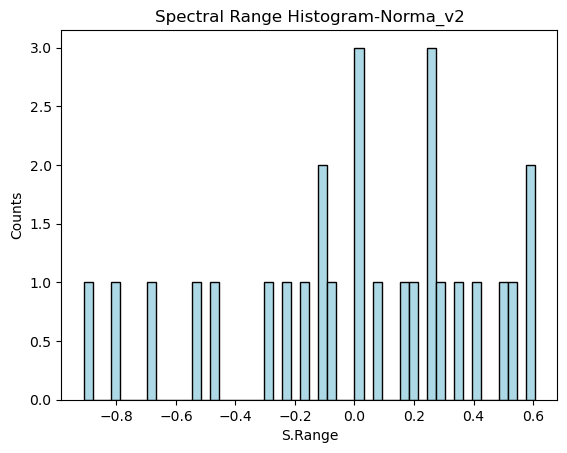

In [26]:
N1=histograms(normav2['rms'], 'RMS Histogram-Norma_v2','rms')
N2=histograms(normav2['S.Deviation'], 'S.Deviation Histogram-Norma',r'$\sigma$')
N3=histograms(normav2['S/N'], 'S/N Histogram-Norma_v2','S/N')
N4=histograms(normav2['Max.noise'], 'Maximum noise Histogram-Norma_v2','Max.noise')
N5=histograms(normav2['Max.signal'], 'Maximum signal Histogram-Norma_v2','Max.signal')
N6=histograms(normav2['S.Range'], 'Spectral Range Histogram-Norma_v2','S.Range')

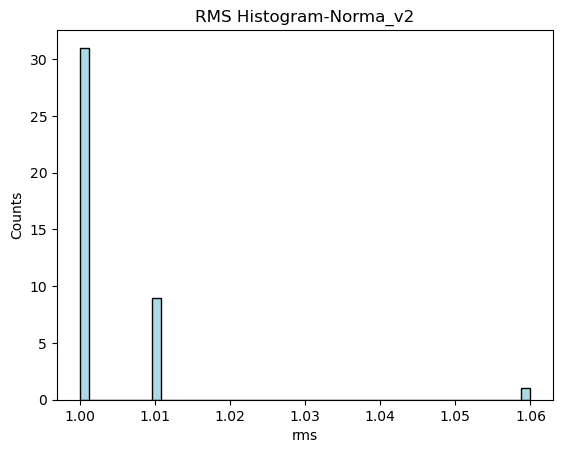

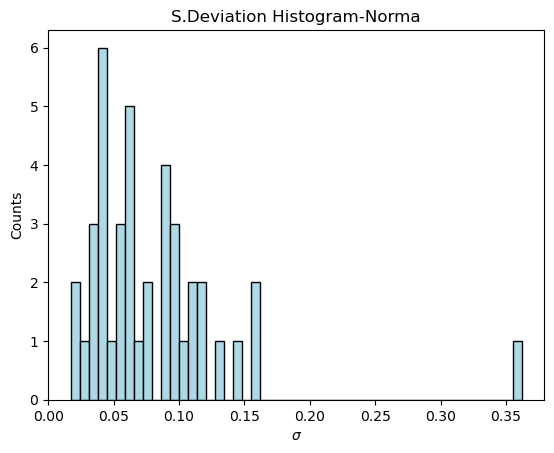

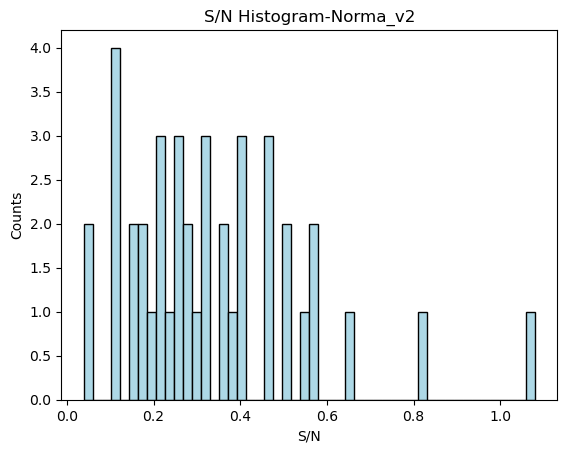

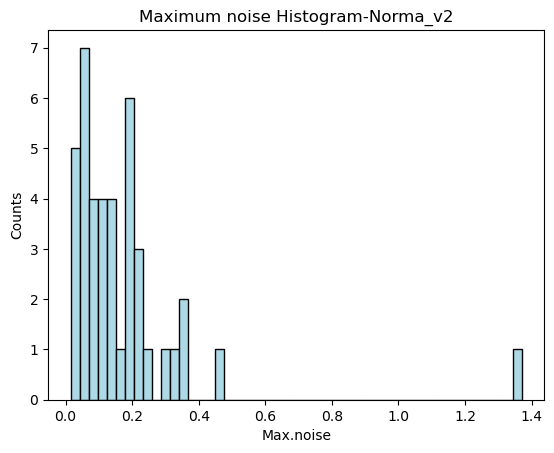

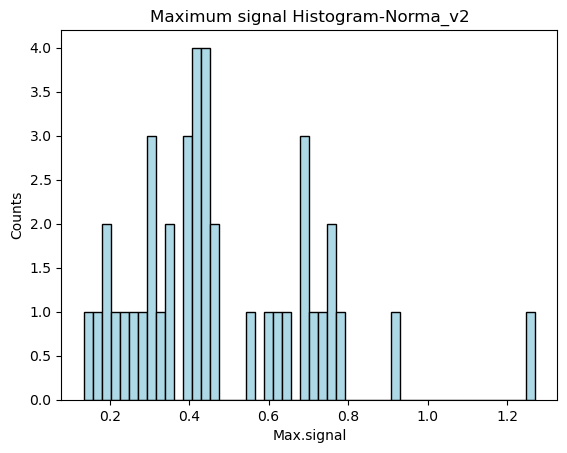

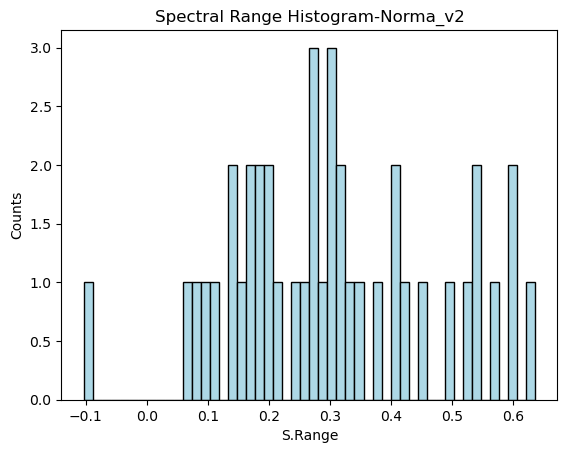

In [27]:
N7=histograms(normav4['rms'], 'RMS Histogram-Norma_v2','rms')
N8=histograms(normav4['S.Deviation'], 'S.Deviation Histogram-Norma',r'$\sigma$')
N9=histograms(normav4['S/N'], 'S/N Histogram-Norma_v2','S/N')
N10=histograms(normav4['Max.noise'], 'Maximum noise Histogram-Norma_v2','Max.noise')
N11=histograms(normav4['Max.signal'], 'Maximum signal Histogram-Norma_v2','Max.signal')
N12=histograms(normav4['S.Range'], 'Spectral Range Histogram-Norma_v2','S.Range')